<a href="https://colab.research.google.com/github/empatterson/Lab7-Geoparsing/blob/main/Lab7challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
'''
Emily Patterson
5/28/21
Python 3.7.10
This code extracts city names from a .txt file creates a histogram of the cities
and then plots the locations on a map. 



'\nEmily Patterson\n5/28/21\nPython 3.7.10\nThis code extracts city names from a .txt file creates a histogram of the cities\nand then plots the locations on a map. '

In [4]:
# Install packages as needed
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

# Importing all the libraries 
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon

In [24]:
#Scrape the text from a url (Project Gutenberg website)

url = 'https://www.gutenberg.org/files/829/829-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:73]}')

<class 'str'>, 
611764, 
﻿The Project Gutenberg eBook of Gulliver’s Travels, by Jonathan Swift




In [10]:
#use Geotext to extraxt city names from the txt file
places = GeoText(raw)
cities = list(places.cities)
#Calling this shows my list of cities
cities 

['Most',
 'Newark',
 'Banbury',
 'Oxford',
 'Smithfield',
 'London',
 'Cambridge',
 'London',
 'London',
 'Prichard',
 'Antelope',
 'Bristol',
 'Of',
 'Of',
 'Of',
 'Providence',
 'Providence',
 'Of',
 'Van',
 'Diemen',
 'Epping',
 'Liverpool',
 'March',
 'Chelsea',
 'London',
 'London',
 'London',
 'Dunstable',
 'Gresham',
 'Salisbury',
 'Bristol',
 'Versailles',
 'Of',
 'Cicero',
 'Venice',
 'Hopewell',
 'George',
 'Of',
 'Most',
 'Of',
 'London',
 'Bristol',
 'Portsmouth',
 'Hannibal',
 'Rome',
 'Roman',
 'Roman',
 'Antony',
 'Rome',
 'Rome',
 'Amsterdam',
 'Amsterdam',
 'Amsterdam',
 'Holland',
 'Holland',
 'Holland',
 'Amsterdam',
 'Amsterdam',
 'Portsmouth',
 'Bristol',
 'Orange',
 'Alliance',
 'Of',
 'Lisbon',
 'Lisbon',
 'Lisbon',
 'Lisbon',
 'London',
 'Of',
 'Mission',
 'Salt Lake',
 'Most']

In [14]:
#This code uses the OSM Nominatim tool to reverse geocode locations
# requires your e-mail address to track usage. Timeout set for 2 seconds.
geolocator = Nominatim(user_agent='empattersonclarku@gmail.com', timeout=2)
lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s">
          (city, e))
lat_lon

[Location(Most, okres Most, Ústecký kraj, Severozápad, Česko, (50.5032737, 13.636112, 0.0)),
 Location(Newark, Essex County, New Jersey, United States, (40.735657, -74.1723667, 0.0)),
 Location(Banbury, Cherwell, Oxfordshire, South East England, England, OX16 0AA, United Kingdom, (52.0601807, -1.3402795, 0.0)),
 Location(Oxford, Chester County, Pennsylvania, 19363, United States, (39.7852062, -75.9790215, 0.0)),
 Location(Smithfield, Johnston County, North Carolina, 27577, United States, (35.5085531, -78.33936, 0.0)),
 Location(London, Greater London, England, United Kingdom, (51.5073219, -0.1276474, 0.0)),
 Location(Cambridge, Cambridgeshire, East of England, England, United Kingdom, (52.2034823, 0.1235817, 0.0)),
 Location(London, Greater London, England, United Kingdom, (51.5073219, -0.1276474, 0.0)),
 Location(London, Greater London, England, United Kingdom, (51.5073219, -0.1276474, 0.0)),
 Location(Prichard, Mobile County, Alabama, United States, (30.7387998, -88.0788889, 0.0)),
 

In [16]:
#transform the data into a datafram 
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,"Most, okres Most, Ústecký kraj, Severozápad, Č...","(50.5032737, 13.636112)"
1,"Newark, Essex County, New Jersey, United States","(40.735657, -74.1723667)"
2,"Banbury, Cherwell, Oxfordshire, South East Eng...","(52.0601807, -1.3402795)"
3,"Oxford, Chester County, Pennsylvania, 19363, U...","(39.7852062, -75.9790215)"
4,"Smithfield, Johnston County, North Carolina, 2...","(35.5085531, -78.33936)"
5,"London, Greater London, England, United Kingdom","(51.5073219, -0.1276474)"
6,"Cambridge, Cambridgeshire, East of England, En...","(52.2034823, 0.1235817)"


In [17]:
#Use Shapely to turn the data from Tuple into points
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

In [19]:
# Define the coordinate system
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,City Name,Coordinates,geometry
0,"Most, okres Most, Ústecký kraj, Severozápad, Č...","(50.5032737, 13.636112)",POINT (13.63611 50.50327)
1,"Newark, Essex County, New Jersey, United States","(40.735657, -74.1723667)",POINT (-74.17237 40.73566)
2,"Banbury, Cherwell, Oxfordshire, South East Eng...","(52.0601807, -1.3402795)",POINT (-1.34028 52.06018)
3,"Oxford, Chester County, Pennsylvania, 19363, U...","(39.7852062, -75.9790215)",POINT (-75.97902 39.78521)
4,"Smithfield, Johnston County, North Carolina, 2...","(35.5085531, -78.33936)",POINT (-78.33936 35.50855)


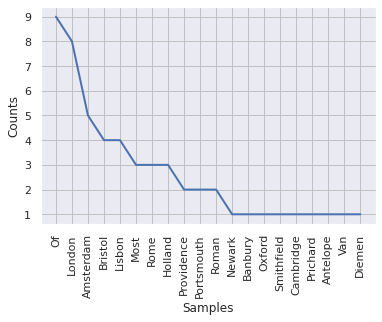

In [20]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(cities)
freqdist1.plot(20) #specifying the top 20 results

In [21]:
#import required libraries, packages to make a folium map
import folium
from folium import plugins
import json


In [26]:
# Converting geopandas dataframe to geojson so it can be plotted on a web map with folium.
geo_df['geometry'].to_file("Gulliver.geojson", driver='GeoJSON')

# initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
SwiftMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Terrain', zoom_start=2)

folium.GeoJson("Gulliver.geojson").add_to(SwiftMap)

# Display map   
SwiftMap